# Pymaceuticals Inc.
---

### Analysis
In this activity, I started by creating a list of treatments. This list helped us focus on the specific drugs I wanted to analyze. I then prepared to extract the tumor volume data associated with these treatments. For each treatment, I filtered the data to get the tumor volumes and added this information to a list for easy access later. To identify any unusual data points, I calculated the interquartile rangefor each treatment. This helped me understand the spread of the middle part of the data. Using this range, I determined the boundaries for potential outliers.

The results showed the potential outliers for each treatment.
 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)

NameError: name 'df' is not defined

In [14]:
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [15]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [16]:
print(df.shape)
df.info()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [34]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
top_10_counts = df.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)
print(top_10_counts)

     Mouse ID  Timepoint  counts
590      g989         20       2
589      g989         15       2
588      g989         10       2
587      g989          5       2
586      g989          0       2
0        a203          0       1
1264     q633          0       1
1260     q610         20       1
1261     q610         25       1
1262     q610         30       1


In [37]:

# Optional: Get all the data for a specific duplicate Mouse ID, e.g., "g989"
duplicate_id = "g989"  # replace this with the actual ID you want to inspect
mask = df["Mouse ID"] == duplicate_id
duplicate_data = df.loc[mask]

print(duplicate_data)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [38]:
# Create a mask to exclude the duplicate Mouse ID
mask = df["Mouse ID"] != "g989"

# Apply the mask to create a new DataFrame without the duplicate rows
df2 = df.loc[mask].reset_index(drop=True)

# Print the shape of the new DataFrame to verify the result
print(df2.shape)

(1880, 8)


In [39]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [41]:
# Calculate the required statistics for each drug regimen
tumor_mean = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Create a dictionary to assemble the statistics into a DataFrame
data = {
    "Tumor Mean": tumor_mean,
    "Tumor Median": tumor_median,
    "Tumor Variance": tumor_variance,
    "Tumor Std Dev": tumor_std,
    "Tumor SEM": tumor_sem
}

# Assemble the resulting series into a single summary DataFrame
summary_df = pd.DataFrame(data).reset_index()

# Display the summary statistics table
print(summary_df)

  Drug Regimen  Tumor Mean  Tumor Median  Tumor Variance  Tumor Std Dev  \
0    Capomulin   40.675741     41.557809       24.947764       4.994774   
1     Ceftamin   52.591172     51.776157       39.290177       6.268188   
2    Infubinol   52.884795     51.820584       43.128684       6.567243   
3     Ketapril   55.235638     53.698743       68.553577       8.279709   
4     Naftisol   54.331565     52.509285       66.173479       8.134708   
5      Placebo   54.033581     52.288934       61.168083       7.821003   
6     Propriva   52.320930     50.446266       43.852013       6.622085   
7     Ramicane   40.216745     40.673236       23.486704       4.846308   
8     Stelasyn   54.233149     52.431737       59.450562       7.710419   
9    Zoniferol   53.236507     51.818479       48.533355       6.966589   

   Tumor SEM  
0   0.329346  
1   0.469821  
2   0.492236  
3   0.603860  
4   0.596466  
5   0.581331  
6   0.544332  
7   0.320955  
8   0.573111  
9   0.516398  


In [11]:
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)

NameError: name 'df' is not defined

## Bar and Pie Charts

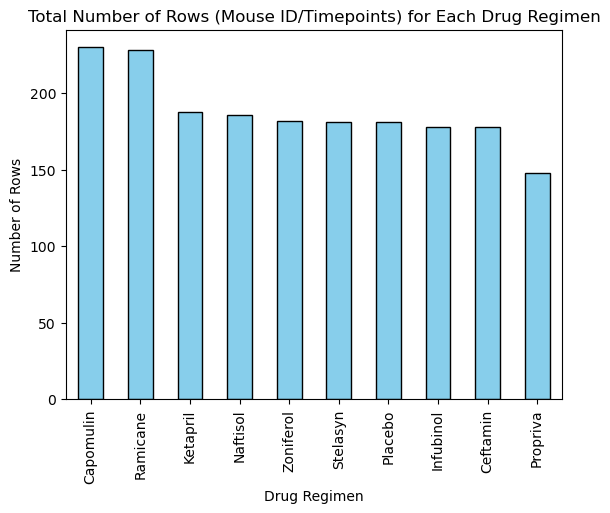

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by "Drug Regimen" and count the number of entries for each regimen
regimen_counts = df2["Drug Regimen"].value_counts()

# Generate a bar plot
regimen_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()

In [6]:
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)

NameError: name 'df' is not defined

In [7]:

# Get the counts of Mouse ID/Timepoints for each drug regimen
data = df2["Drug Regimen"].value_counts()
x = list(data.index)
y = list(data.values)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Optional: to set the figure size
plt.bar(x, y, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()

NameError: name 'df2' is not defined

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df2["Sex"].value_counts() 

NameError: name 'df2' is not defined

In [4]:
# Don't use this example

In [4]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of female and male mice
gender_counts = df2["Sex"].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

# Create a pie plot
plt.figure(figsize=(8, 8))  # Optional: to set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])

# Add a title
plt.title('Distribution of Female versus Male Mice')

# Display the plot
plt.show()

NameError: name 'df2' is not defined

## Quartiles, Outliers and Boxplots

In [29]:
import seaborn as sns

In [28]:
# datatables (prof work help)
df3 = df2.groupby("Mouse ID").Timepoint.max().reset_index()
sub = df2.loc[:, ["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)", "Sex"]] # subsetting columns we care about

df3 = pd.merge(df3, sub, on=["Mouse ID", "Timepoint"])

# overwrite
mask = df3["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
df3 = df3.loc[mask].reset_index(drop=True) # dropping rows

df3

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex
0,a203,45,Infubinol,67.973419,Female
1,a251,45,Infubinol,65.525743,Female
2,a275,45,Ceftamin,62.999356,Female
3,a411,45,Ramicane,38.407618,Male
4,a444,45,Ramicane,43.047543,Female
...,...,...,...,...,...
95,y769,45,Ceftamin,68.594745,Female
96,y793,45,Capomulin,31.896238,Male
97,y865,45,Ceftamin,64.729837,Male
98,z578,45,Ramicane,30.638696,Male


In [13]:
# Import necessary libraries
import numpy as np

# Initialize an empty list to store outlier information
outliers_dict = {}

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = df3.loc[df3["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add subset to tumor_vol_data list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Store outlier information
    outliers_dict[treatment] = outliers

# Print the outliers for each treatment
for treatment, outliers in outliers_dict.items():
    print(f"{treatment} potential outliers: {outliers.tolist()}")

NameError: name 'treatments' is not defined

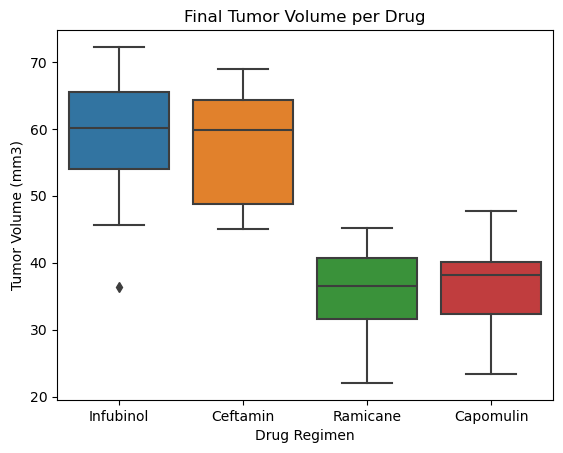

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group (prof work and xpert help)
sns.boxplot(data=df3, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.title("Final Tumor Volume per Drug")
plt.show()

In [8]:
# THE POWER OF SEABORN
sns.violinplot(data=df3, x="Drug Regimen", y="Tumor Volume (mm3)", hue="Sex", split=True)
plt.xticks(rotation=90)
plt.title("Final Tumor Volume")
plt.show()

NameError: name 'sns' is not defined

## Line and Scatter Plots

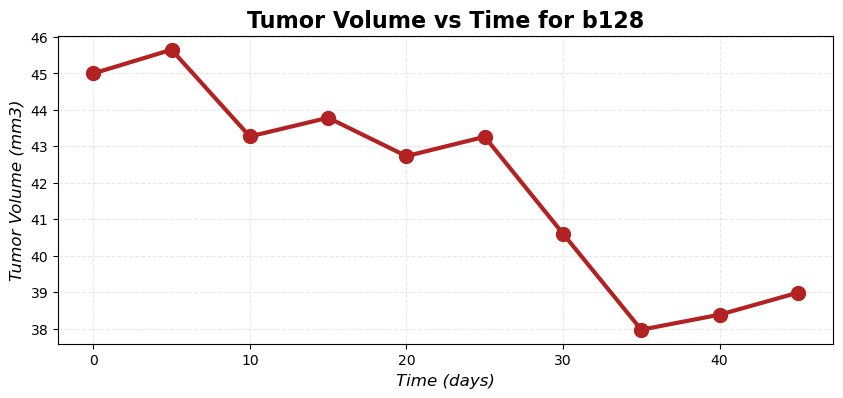

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df2.loc[df2["Drug Regimen"] == "Capomulin"]

mouse = "b128"

data = df2.loc[df2["Mouse ID"] == mouse]

# Step 1: Get the data
# x_axis, points_F, points_C
time = data["Timepoint"]
y = data["Tumor Volume (mm3)"]

# Step 2: Initialize the canvas
plt.figure(figsize=(10, 4))

# Step 3: Vanilla graph (aka a BLAND graph) or a skeleton graph
plt.plot(time, y, color="firebrick", linewidth=3, marker="o", markersize=10)

# Step 4: Customize the graph
# LABEL X/Y Axis (UNITS when appropriate)
# TITLE
# Color - NO DEFAULT COLORS
# Optional: Line Thickness, markers, legend, gridlines
plt.xlabel("Time (days)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title(f"Tumor Volume vs Time for {mouse}", fontsize=16, fontweight="bold")

# set limits (optional...)
# plt.xlim(-5, 125)
# plt.ylim(0, 100)

# legend and grid
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)

# Step 5: Show/Save the Graph
# plt.savefig("prof_beautiful_graph.png")
plt.show()

In [10]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = df2.loc[df2["Drug Regimen"] == "Capomulin"]

# this was hard
df4 = data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()

x = df4["Weight (g)"]
y = df4["Tumor Volume (mm3)"]

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="black", edgecolor="white", s=250)

# Step 4: Customizations
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=16)

# plt.xlim(10, 27)
# plt.ylim(0, 650)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.show()

NameError: name 'df2' is not defined

## Correlation and Regression

In [10]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Modelling libraries
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
corrs = df4.corr(numeric_only = True)
corrs

NameError: name 'df4' is not defined

In [ ]:
.84 ** 2

In [14]:
# USING LINREGRESS
x_values = df4["Weight (g)"]
y_values = df4["Tumor Volume (mm3)"]

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="coral", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "r-") # plot the line of best fit

# Step 4: Customizations
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

NameError: name 'df4' is not defined

In [ ]:
# in the scikit learn lib

x_values = df4["Weight (g)"].values.reshape(-1, 1)
y_values = df4["Tumor Volume (mm3)"].values

lr = LinearRegression()
lr.fit(x_values,  y_values)

# LR equation
slope = lr.coef_[0]
intercept = lr.intercept_
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# predictions
preds = lr.predict(x_values)

print(line_eq)

# Metric
r2value = r2_score(y_values, preds)
print(f"The r-squared is: {r2value}")

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
plt.plot(x_values, preds, "r-") # plot the line of best fit

# Step 4: Customizations
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=15,color="red")

plt.show()